# Proyecto de ML supervisado
PREDICCIÓN DE CANCELACIÓN DE RESERVAS EN CADENA HOTELERA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_1 = pd.read_csv('bookings.csv')
df_2 = pd.read_csv('hotels.csv')
df_3 = pd.read_csv('people.csv')

In [3]:
df_merge_1 = pd.merge(df_1, df_2, on='hotel')

In [4]:
df = pd.merge(df_merge_1, df_3, on='name')

In [5]:
df.rename(columns={'country' : 'customers_country'}, inplace=True)
df.sample(2)

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,total_cost,is_canceled,hotel_country,has_pool,has_spa,has_theatre,stars,customers_country,date_of_birth
4366,f09d1d23-001c-4a49-bad1-6929cef1a53c,Ashley Singh,QPT,2022-06-06 02:11:49,1,double,3,2022-06-17,2022-06-21,1,471.63,True,Argentina,True,True,False,2,Kuwait,2002-06-27
1048,491b23cb-6543-416b-af65-1cbe11e27f78,Donna Farmer,NAD,2022-02-09 17:20:27,4,single,3,2022-04-03,2022-04-11,4,2852.24,True,Syrian Arab Republic,True,False,True,4,Brazil,1999-11-07


In [6]:
df.shape

(5000, 19)

Inicialmente tenemos 5000 reservas y 19 variables

In [7]:
df.dtypes

booking_id            object
name                  object
hotel                 object
booking_timestamp     object
n_rooms                int64
room_type             object
children               int64
arrival_timestamp     object
leave_timestamp       object
guests                 int64
total_cost           float64
is_canceled             bool
hotel_country         object
has_pool                bool
has_spa                 bool
has_theatre             bool
stars                  int64
customers_country     object
date_of_birth         object
dtype: object

In [8]:
df.describe().round(2)

,n_rooms,children,guests,total_cost,stars
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,1.78,0.68,3.14,2144.14,2.91
std,0.95,1.00,2.63,2433.92,1.55
min,1.00,0.00,1.00,56.04,1.00
25%,1.00,0.00,1.00,679.80,1.00
50%,1.00,0.00,2.00,1381.63,3.00
75%,2.00,1.00,4.00,2678.79,4.00
max,4.00,3.00,24.00,23428.24,5.00


In [9]:
df.isnull().sum()

booking_id           0
name                 0
hotel                0
booking_timestamp    0
n_rooms              0
room_type            0
children             0
arrival_timestamp    0
leave_timestamp      0
guests               0
total_cost           0
is_canceled          0
hotel_country        0
has_pool             0
has_spa              0
has_theatre          0
stars                0
customers_country    0
date_of_birth        0
dtype: int64

Observamos que no hay nulos

# 1. **Creación del conjunto de datos**
## EDA e ingeniería de atributos

### Análisis de la variable objetivo (*is_canceled*)

In [10]:
df['is_canceled'].value_counts()

False    3486
True     1514
Name: is_canceled, dtype: int64

In [11]:
is_canceled_mean = df.is_canceled.mean()
is_canceled_mean

0.3028

La tasa de cancelación es del 30.28%

In [12]:
is_canceled_count =df.is_canceled.sum() / df.is_canceled.count()
is_canceled_count

0.3028

Observamos que realmente no hay diferencia entre usar mean y count

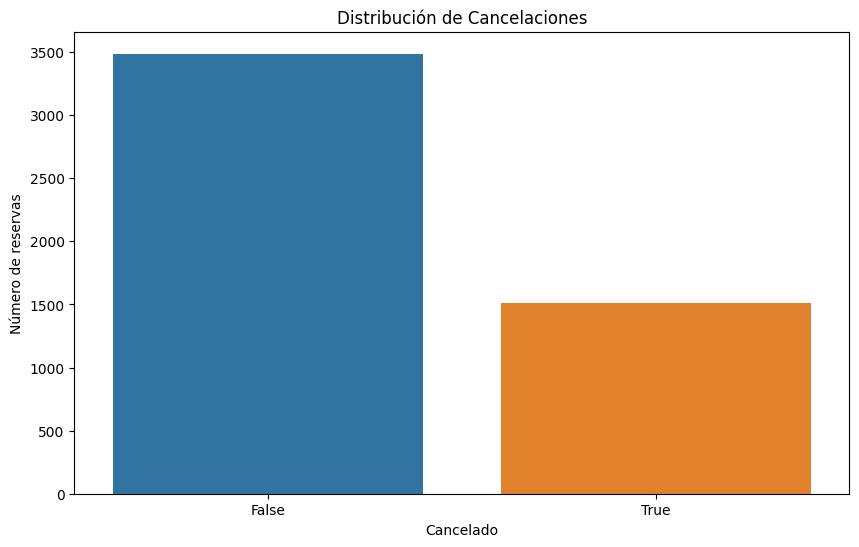

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_canceled')

plt.title('Distribución de Cancelaciones')
plt.xlabel('Cancelado')
plt.ylabel('Número de reservas')

plt.show()

En el gráfico observamos la cantidad de cancelaciones y no cancelaciones del total de bookings

### Variable *hotel_contry*

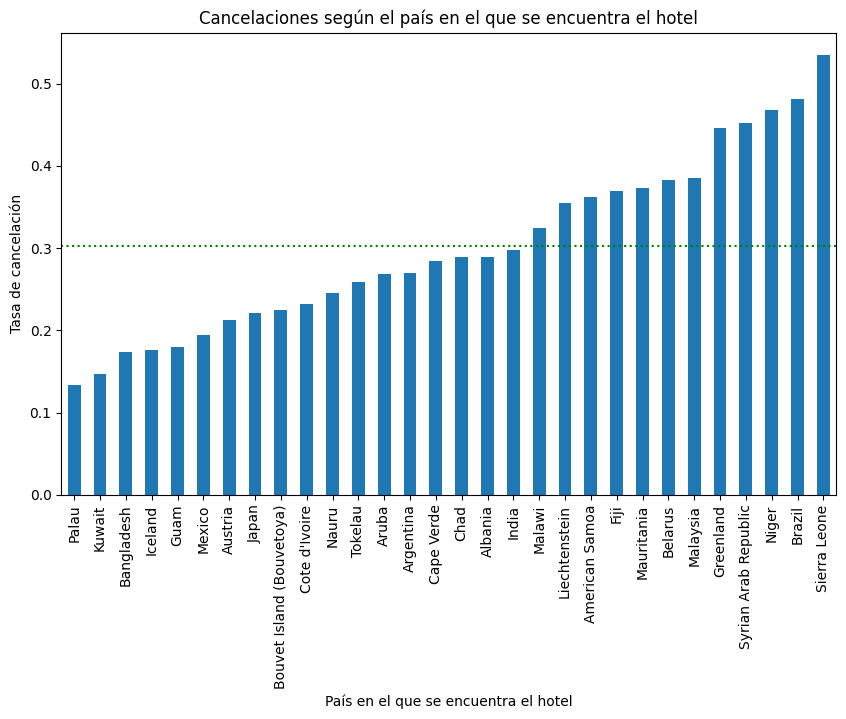

In [14]:
ax = df.groupby('hotel_country').is_canceled.mean().sort_values().plot.bar(figsize=(10, 6))
ax.set_title('Cancelaciones según el país en el que se encuentra el hotel')
ax.set_ylabel('Tasa de cancelación')
ax.set_xlabel('País en el que se encuentra el hotel')
ax.axhline(df.is_canceled.mean(), c='green', linestyle=':')
plt.show()

En este gráfico observamos las cancelaciones que han obtenido los diferentes hoteles, con respecto a sus propios bookings.
Esto puede no ser muy indicativo del total, puesto que la media toma en cuenta las cancelaciones con respecto a las reservas del propio hotel, no con respecto al total.

Por ello más abajo vamos a representar frecuencias de cancelaciones, con respecto al total de reservas.

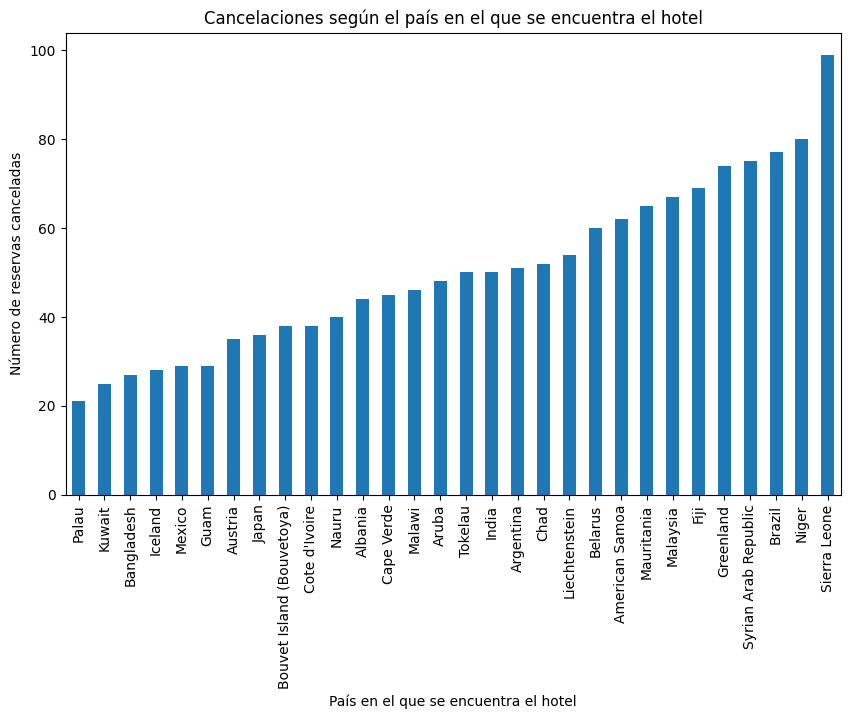

In [15]:
reservas_canceladas = df[df['is_canceled'] == True]

conteo_cancelaciones_por_pais = reservas_canceladas['hotel_country'].value_counts().sort_values()
conteo_cancelaciones_por_pais.plot(kind='bar', figsize=(10, 6))

plt.title('Cancelaciones según el país en el que se encuentra el hotel')
plt.xlabel('País en el que se encuentra el hotel')
plt.ylabel('Número de reservas canceladas')
plt.xticks(rotation=90)

plt.show()

Nos llama la atención Sierra Leone donde vemos que ha habido muchas cancelaciones.

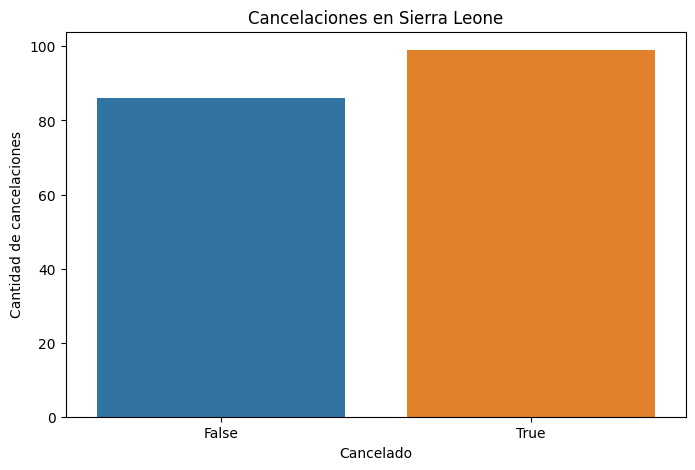

In [16]:
sierra_leone_data = df[df['hotel_country'] == 'Sierra Leone']

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df[df['hotel_country'] == 'Sierra Leone'], x='is_canceled')

ax.set_title('Cancelaciones en Sierra Leone')
ax.set_ylabel('Cantidad de cancelaciones')
ax.set_xlabel('Cancelado')

plt.show()

Observamos que en Sierra Leone ha habido más cancelaciones que no cancelaciones

### Variable *hotel*

In [17]:
df.hotel.nunique()

30

Tenemos 30 hoteles diferentes

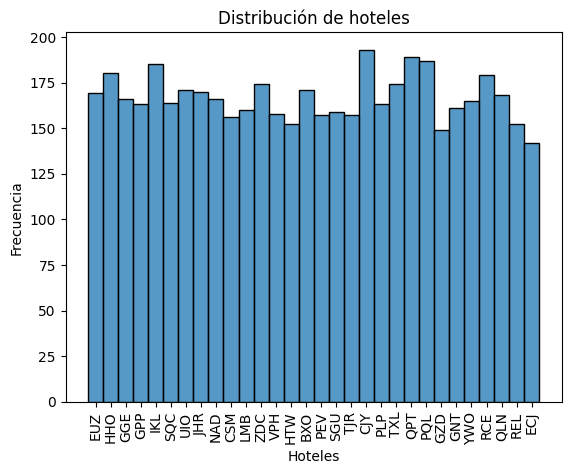

In [18]:
sns.histplot(df['hotel'])

plt.xlabel('Hoteles')
plt.ylabel('Frecuencia')
plt.title('Distribución de hoteles')
plt.xticks(rotation=90)
plt.show()

In [19]:
df.groupby(['hotel', 'hotel_country'])['is_canceled'].mean()

hotel  hotel_country            
BXO    Niger                        0.467836
CJY    Tokelau                      0.259067
CSM    Bangladesh                   0.173077
ECJ    Malawi                       0.323944
EUZ    Bouvet Island (Bouvetoya)    0.224852
GGE    Greenland                    0.445783
GNT    Guam                         0.180124
GPP    Nauru                        0.245399
GZD    Mexico                       0.194631
HHO    Chad                         0.288889
HTW    Liechtenstein                0.355263
IKL    Sierra Leone                 0.535135
JHR    Kuwait                       0.147059
LMB    Brazil                       0.481250
NAD    Syrian Arab Republic         0.451807
PEV    Belarus                      0.382166
PLP    Japan                        0.220859
PQL    Fiji                         0.368984
QLN    India                        0.297619
QPT    Argentina                    0.269841
RCE    Aruba                        0.268156
REL    Albania        

Vemos que cada *hotel* tiene correspondencia con un *hotel_country*, y esa variable ya la hemos analizado antes

### Variable *customers_country*

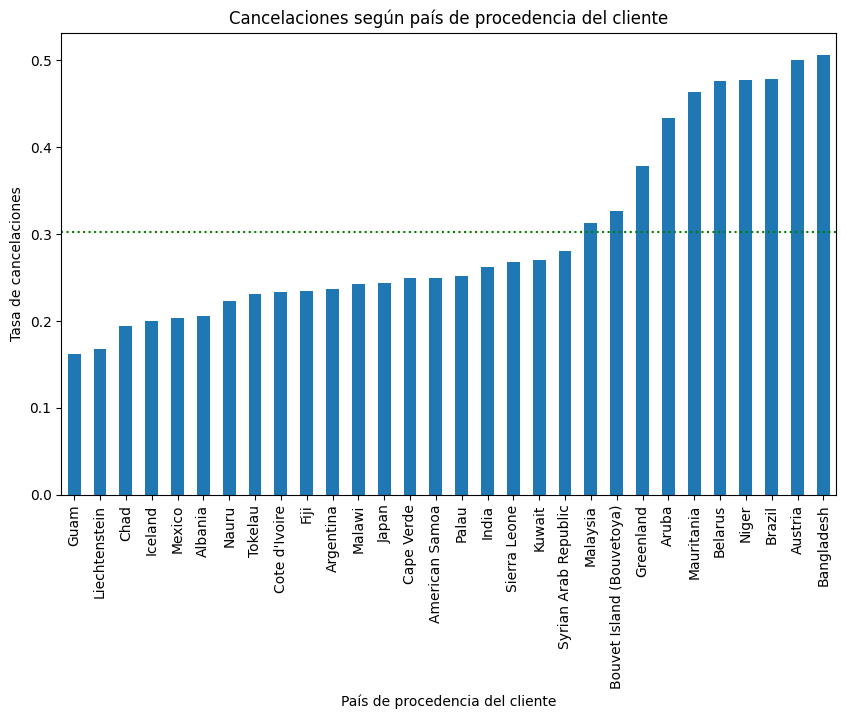

In [20]:
ax = df.groupby('customers_country').is_canceled.mean().sort_values().plot.bar(figsize=(10, 6))
ax.set_title('Cancelaciones según país de procedencia del cliente')
ax.set_ylabel('Tasa de cancelaciones')
ax.set_xlabel('País de procedencia del cliente')
ax.axhline(df.is_canceled.mean(), c='green', linestyle=':')
plt.show()

Este gráfico muestra las cancelaciones medias según el país de procedencia del cliente

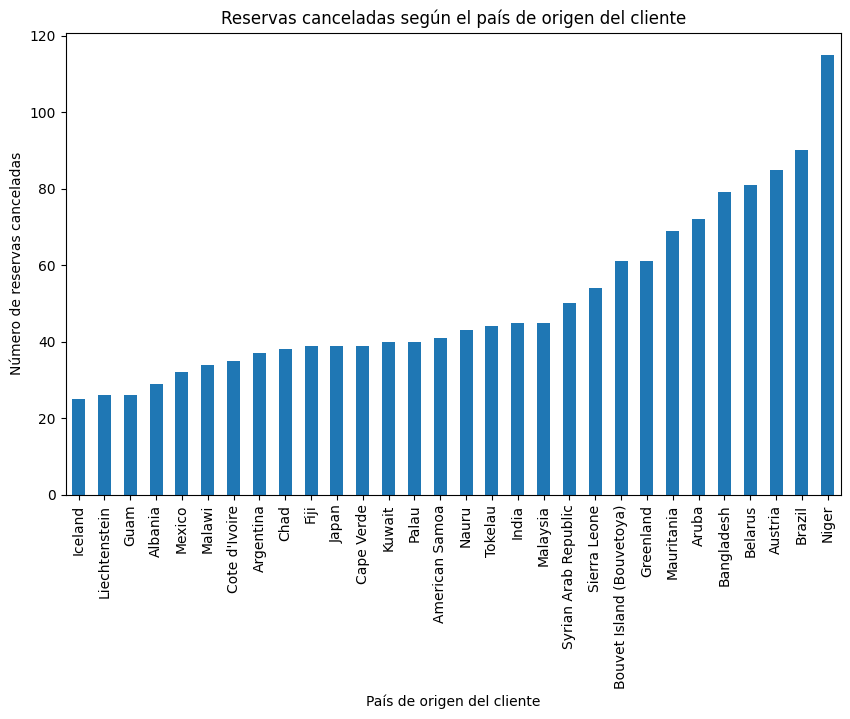

In [21]:
reservas_canceladas = df[df['is_canceled'] == True]

conteo_cancelaciones_por_pais = reservas_canceladas['customers_country'].value_counts().sort_values()
conteo_cancelaciones_por_pais.plot(kind='bar', figsize=(10, 6))

plt.title('Reservas canceladas según el país de origen del cliente')
plt.xlabel('País de origen del cliente')
plt.ylabel('Número de reservas canceladas')
plt.xticks(rotation=90)

plt.show()

En este gráfico se observan las frecuencias de cancelaciones (con respecto al total de bookings) de los clientes según su país de origen

### Variable *stars*

In [22]:
df.stars.value_counts()

1    1511
4    1331
5     982
2     708
3     468
Name: stars, dtype: int64

La mayoría de hoteles son de 1 estrella, y los menos frecuentes son de 3 estrellas

In [23]:
df.stars.describe()

count    5000.000000
mean        2.913000
std         1.547614
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

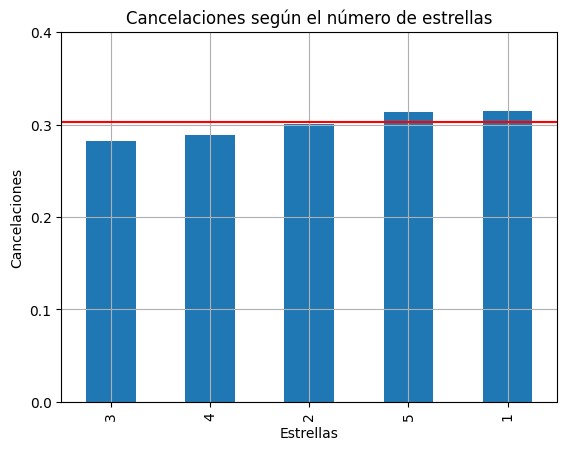

In [24]:
df.groupby('stars').is_canceled.mean().sort_values().plot.bar();
plt.axhline(is_canceled_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.title('Cancelaciones según el número de estrellas')
plt.ylabel('Cancelaciones')
plt.xlabel('Estrellas')
plt.ylim(0, 0.4)
plt.grid()

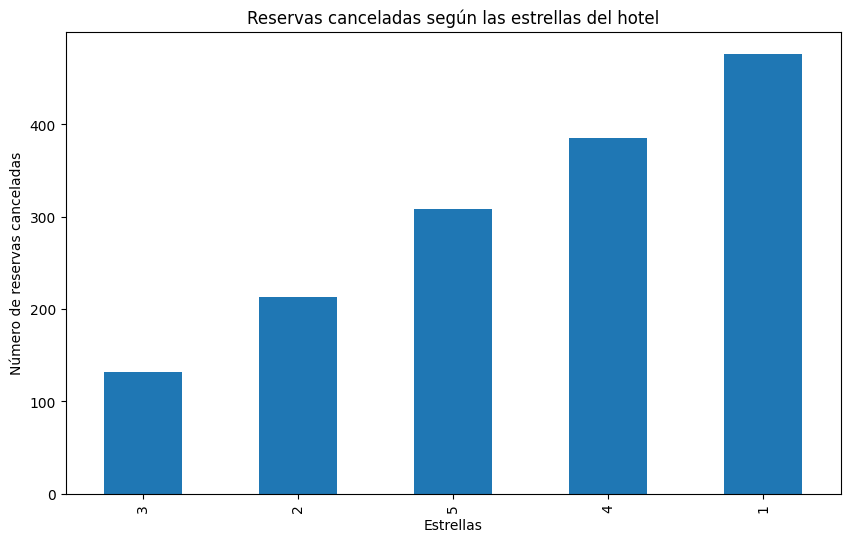

In [25]:
reservas_canceladas = df[df['is_canceled'] == True]

conteo_cancelaciones_por_pais = reservas_canceladas['stars'].value_counts().sort_values()
conteo_cancelaciones_por_pais.plot(kind='bar', figsize=(10, 6))

plt.title('Reservas canceladas según las estrellas del hotel')
plt.xlabel('Estrellas')
plt.ylabel('Número de reservas canceladas')
plt.xticks(rotation=90)

plt.show()

Comparando ambos gráficos llegamos a la conclusión de que los hoteles de una estrella son los que más se cancelan, y los de tres, los que menos

### Variables *has_pool, has_spa, has_theatre*

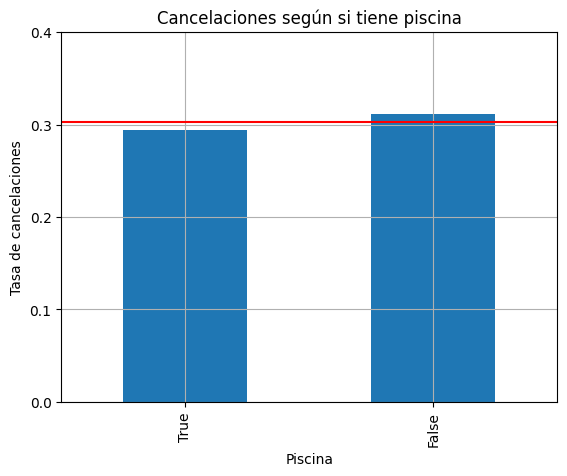

In [26]:
df.groupby('has_pool').is_canceled.mean().sort_values().plot.bar();
plt.axhline(is_canceled_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.title('Cancelaciones según si tiene piscina')
plt.ylabel('Tasa de cancelaciones')
plt.xlabel('Piscina')
plt.ylim(0, 0.4)
plt.grid()

Observando el gráfico podríamos decir que los hoteles con piscina tienen menos cancelaciones que los que no tienen

In [27]:
df_pool = df.pivot_table(index='has_pool', columns='hotel', values='is_canceled')
df_pool.T

has_pool,False,True
hotel,,
BXO,NaN,0.467836
CJY,0.259067,NaN
CSM,0.173077,NaN
ECJ,NaN,0.323944
EUZ,NaN,0.224852
GGE,NaN,0.445783
GNT,NaN,0.180124
GPP,0.245399,NaN
GZD,NaN,0.194631


Además, en esta tabla observamos las cancelaciones de los diferentes hoteles, donde viene indicado además si tienen piscina o no

In [28]:
df_pool.count(True)

has_pool
False    15
True     15
dtype: int64

Vemos que hay el mismo número de hoteles con piscina que sin ella

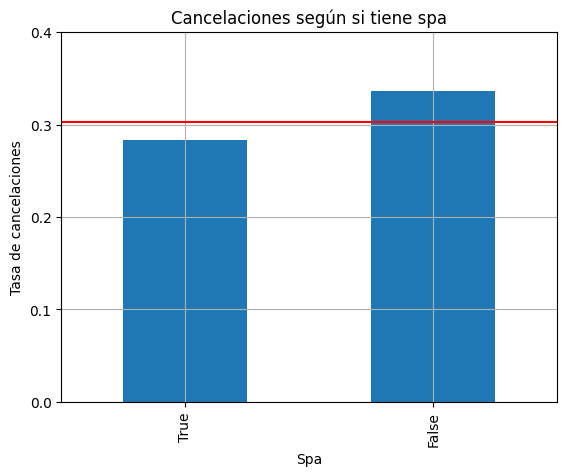

In [29]:
df.groupby('has_spa').is_canceled.mean().sort_values().plot.bar();
plt.axhline(is_canceled_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.title('Cancelaciones según si tiene spa')
plt.ylabel('Tasa de cancelaciones')
plt.xlabel('Spa')
plt.ylim(0, 0.4)
plt.grid()

En este caso, los hoteles con spa tienen más cancelaciones. Pero lo que puede pasar es que a lo mejor hay más hoteles con spa que sin spa, y por eso hay más cancelaciones

In [30]:
df_spa = df.pivot_table(index='has_spa', columns='hotel', values='is_canceled')
df_spa.T

has_spa,False,True
hotel,,
BXO,0.467836,NaN
CJY,NaN,0.259067
CSM,NaN,0.173077
ECJ,0.323944,NaN
EUZ,0.224852,NaN
GGE,NaN,0.445783
GNT,NaN,0.180124
GPP,0.245399,NaN
GZD,NaN,0.194631


In [31]:
df_spa.count(True)

has_spa
False    11
True     19
dtype: int64

Efectivamente, vemos que hay más hoteles con spa que sin spa

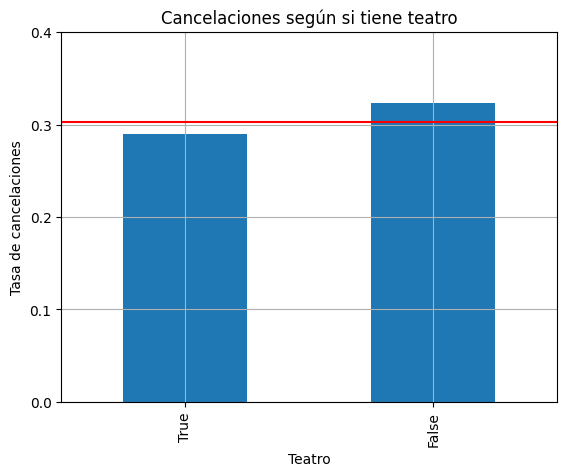

In [32]:
df.groupby('has_theatre').is_canceled.mean().sort_values().plot.bar();
plt.axhline(is_canceled_mean, c='r');
plt.yticks(np.linspace(0, 1, 11))
plt.title('Cancelaciones según si tiene teatro')
plt.ylabel('Tasa de cancelaciones')
plt.xlabel('Teatro')
plt.ylim(0, 0.4)
plt.grid()

In [33]:
df_theatre = df.pivot_table(index='has_theatre', columns='hotel', values='is_canceled')
df_theatre.T

has_theatre,False,True
hotel,,
BXO,0.467836,NaN
CJY,0.259067,NaN
CSM,NaN,0.173077
ECJ,NaN,0.323944
EUZ,NaN,0.224852
GGE,NaN,0.445783
GNT,NaN,0.180124
GPP,NaN,0.245399
GZD,NaN,0.194631


In [34]:
df_theatre.count(True)

has_theatre
False    11
True     19
dtype: int64

Como en el caso de Spa, hay más hoteles con teatro que sin teatro

### Variable *total_cost*

In [35]:
df.total_cost.mean()

2144.1356920000003

In [36]:
df.total_cost.describe().round(2)

count     5000.00
mean      2144.14
std       2433.92
min         56.04
25%        679.80
50%       1381.63
75%       2678.79
max      23428.24
Name: total_cost, dtype: float64

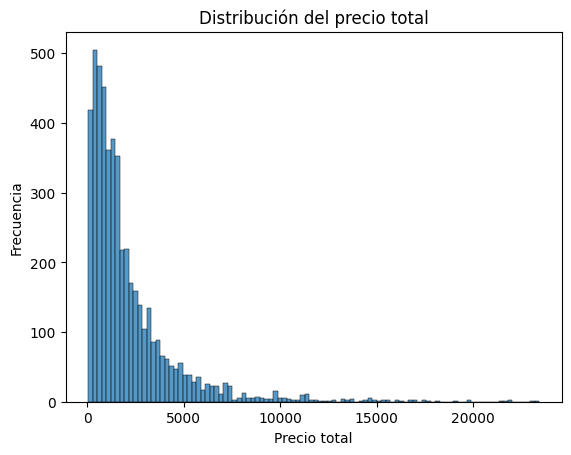

In [37]:
sns.histplot(df['total_cost'])

plt.xlabel('Precio total')
plt.ylabel('Frecuencia')
plt.title('Distribución del precio total')
plt.show()

Aunque la media de precio es de 2.144€, observamos que el rango de distribución de precios es muy amplio, concretamente la diferencia entre el mayor y el menor valor es de 23.372€ (calculado abajo)

In [38]:
df.total_cost.max() - df.total_cost.min()

23372.2

In [39]:
df['cost_quintiles'] = pd.qcut(df.total_cost, 10)
df['cost_quintiles']

0        (801.237, 1071.258]
1          (56.039, 335.426]
2        (1381.63, 1743.816]
3       (4768.213, 23428.24]
4         (335.426, 557.672]
                ...         
4995     (1071.258, 1381.63]
4996      (557.672, 801.237]
4997    (2329.431, 3177.532]
4998     (1071.258, 1381.63]
4999    (2329.431, 3177.532]
Name: cost_quintiles, Length: 5000, dtype: category
Categories (10, interval[float64, right]): [(56.039, 335.426] < (335.426, 557.672] <
                                            (557.672, 801.237] < (801.237, 1071.258] < ... <
                                            (1743.816, 2329.431] < (2329.431, 3177.532] <
                                            (3177.532, 4768.213] < (4768.213, 23428.24]]

Hacemos 10 grupos con los precios para estudiar esta variable de forma más sencilla

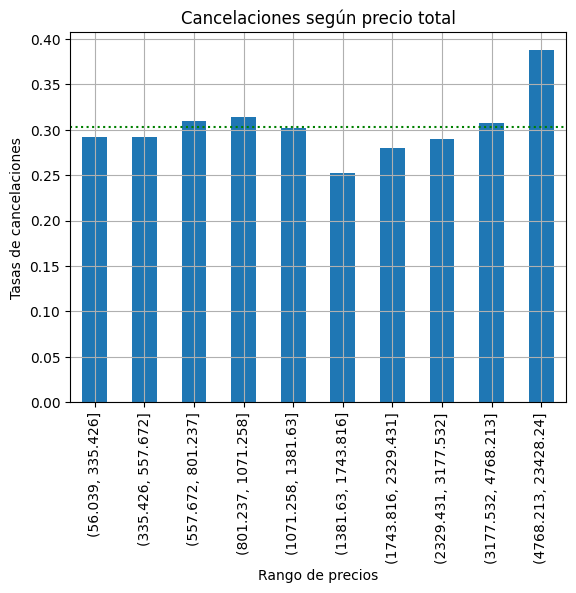

In [40]:
df.groupby('cost_quintiles').is_canceled.mean().plot.bar();
plt.title('Cancelaciones según precio total');
plt.xlabel('Rango de precios')
plt.ylabel('Tasas de cancelaciones')
plt.axhline(df.is_canceled.mean(), c='green', linestyle=':')
plt.grid()

Aparentemente los precios más elevados tienen mayor tasa de cancelación

### Variable *Children*

In [41]:
df['children'].value_counts().sort_values()

2     479
3     484
1     980
0    3057
Name: children, dtype: int64

La mayoría de las reservas son sin niños. Veremos cómo influyen los niños en las cancelaciones

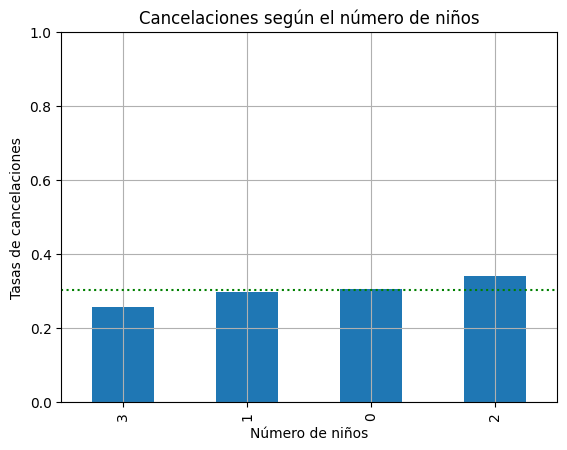

In [42]:
df.groupby('children').is_canceled.mean().sort_values().plot.bar(ylim=(0, 1));
plt.title('Cancelaciones según el número de niños');
plt.xlabel('Número de niños')
plt.ylabel('Tasas de cancelaciones')
plt.axhline(df.is_canceled.mean(), c='green', linestyle=':')
plt.grid()

El tener 3 niños tiene menos tasa de cancelación, puede ser porque es más complicado buscar otro tipo de alojamiento con tantos niños

### Variable *n_rooms*

In [43]:
df.n_rooms.value_counts()

1    2506
2    1567
3     472
4     455
Name: n_rooms, dtype: int64

La mayoría de reservas son de una y de dos habitaciones

In [44]:
df.n_rooms.describe()

count    5000.000000
mean        1.775200
std         0.953544
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: n_rooms, dtype: float64

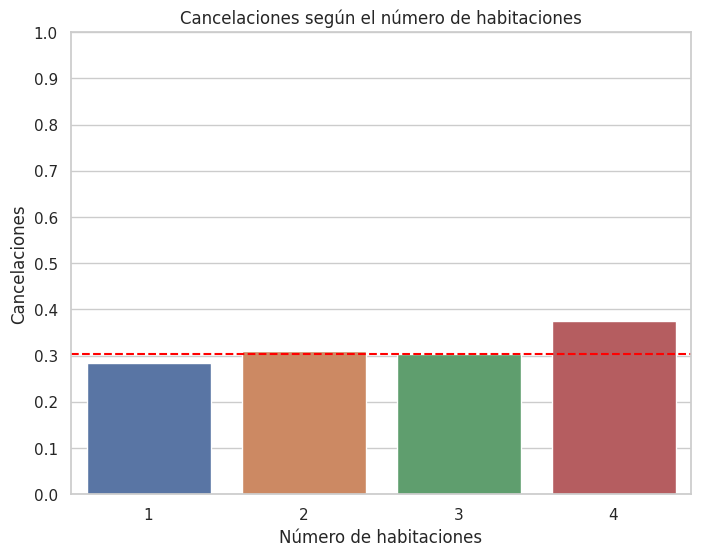

In [45]:
resultados_df = df.groupby('n_rooms')['is_canceled'].mean().sort_values().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='n_rooms', y='is_canceled', data=resultados_df)

plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--')
plt.xticks
plt.ylim(0, 1)
plt.yticks(np.linspace(0, 1, 11))

plt.title('Cancelaciones según el número de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Cancelaciones')

plt.show()

Vemos que la mayoría de cancelaciones son en reservas con cuatro habitaciones. Sin embargo vemos que hay pocos hoteles con cuatro habitaciones, lo cual puede no ser orientativo de la realidad, pues los pocos hoteles que hay de cuatro habitaciones pueden haberse cancelado.

Por otro lado nos llama la atención los hoteles de una habitación, que aunque hay muchos, tienen pocas cancelaciones. Puede ser buen predictor

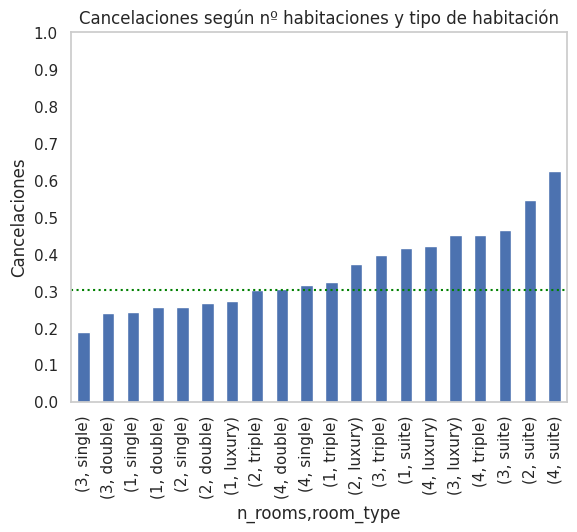

In [46]:
df.groupby(['n_rooms', 'room_type']).is_canceled.mean().sort_values().plot.bar(ylim=(0, 1));
plt.title('Cancelaciones según nº habitaciones y tipo de habitación');
plt.ylabel('Cancelaciones')
plt.yticks(np.linspace(0, 1, 11))
plt.grid()
plt.axhline(df.is_canceled.mean(), c='green', linestyle=':')

También podemos ver las cancelaciones respecto al número de habitaciones y el tipo de habitación. Aparentemente a mayor nº de habitaciones y mejor tipo de habitación (luxury, suite), mayor cancelación. Esto puede tener que ver con el coste de la habitación

### Variable *room_type*

In [47]:
df.room_type.value_counts()

double    2047
single    1014
triple     956
suite      503
luxury     480
Name: room_type, dtype: int64

La mayoría de habitaciones son dobles y singles

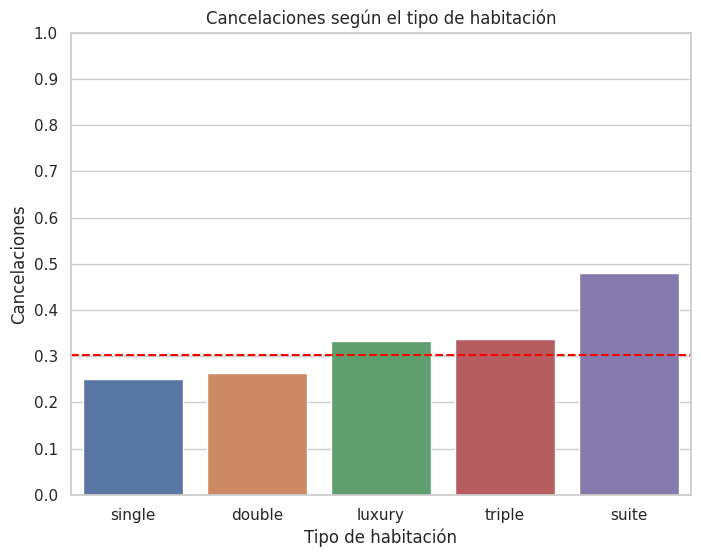

In [48]:
resultados_df = df.groupby('room_type')['is_canceled'].mean().sort_values().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='room_type', y='is_canceled', data=resultados_df)

plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--')
plt.xticks
plt.ylim(0, 1)
plt.yticks(np.linspace(0, 1, 11))

plt.title('Cancelaciones según el tipo de habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cancelaciones')

plt.show()

A pesar de que la mayoría de habitaciones son dobles y singles, su probabilidad de cancelación es baja. Puede ser un buen indicador

In [49]:
df.pivot_table(values='is_canceled', columns='room_type', index='children', margins=True)

room_type,double,luxury,single,suite,triple,All
children,,,,,,
0,0.271475,0.326389,0.255183,0.465190,0.337838,0.306183
1,0.242574,0.365385,0.236842,0.495050,0.331492,0.296939
2,0.327869,0.357143,0.276596,0.520833,0.326531,0.340292
3,0.199115,0.250000,0.213592,0.500000,0.352941,0.256198
All,0.262824,0.333333,0.249507,0.479125,0.336820,0.302800


Esta tabla muestra la tasa de cancelación según el nº de niños y tipo de habitación. Hay que tener cuidado en la interpretación porque por ejemplo hay prob 0.5 con 3 niños en suite, pero a lo mejor lo que ocurre es que no había tantas reservas de ese tipo, y las pocas que hubo se cancelaron. Esta tabla no es representativa del total

In [50]:
df.pivot_table(values='is_canceled', columns='room_type', index='children', aggfunc='count', margins=True)

room_type,double,luxury,single,suite,triple,All
children,,,,,,
0,1234,288,627,316,592,3057
1,404,104,190,101,181,980
2,183,56,94,48,98,479
3,226,32,103,38,85,484
All,2047,480,1014,503,956,5000


Podemos confirmar lo anterior, hay muy pocas reservas con tres niños en luxury.
Por tanto para obtener buenas conclusiones es necesario analizar ambas tablas en conjunto

### Variable *guests*

In [51]:
df.guests.value_counts()

2     1576
1     1276
4      813
3      523
6      351
8      212
12      82
9       47
5       47
10      34
16      16
18       9
20       8
15       4
24       2
Name: guests, dtype: int64

Podemos observar que la mayoría de reservas son hechas para una o dos personas

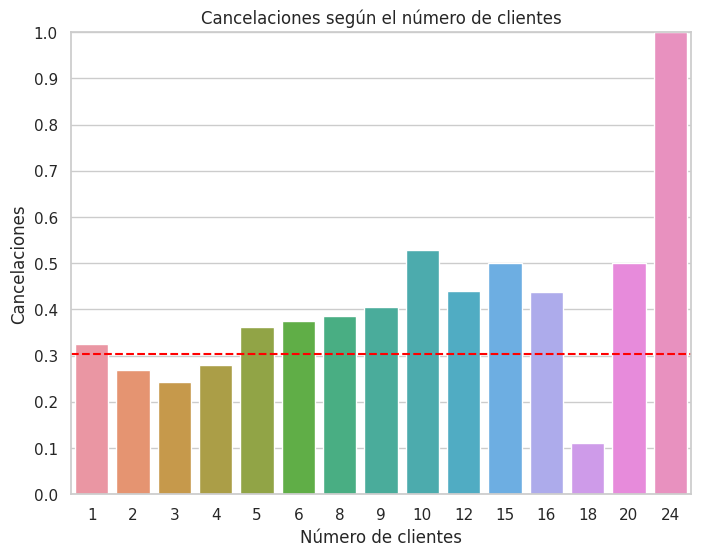

In [52]:
resultados_df = df.groupby('guests')['is_canceled'].mean().sort_values().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='guests', y='is_canceled', data=resultados_df)

plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--')
plt.xticks
plt.ylim(0, 1)
plt.yticks(np.linspace(0, 1, 11))

plt.title('Cancelaciones según el número de clientes')
plt.xlabel('Número de clientes')
plt.ylabel('Cancelaciones')

plt.show()

Nos puede llamar la atención que aunque la mayor frecuencia es 2 clientes, no tienen muchas cancelaciones con respecto al total, están incluso por debajo de la media.

## Ingeniería de atributos y EDA de nuevo

### *booking_timestamp*
Vamos a ver si hay relación entre la fecha en que se hizo la reserva (dia de la semana  y mes) y las cancelaciones

In [53]:
df['fecha_compra']= df['booking_timestamp'].str.split(' ', expand=True)[0]
df.sample(2)

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,...,is_canceled,hotel_country,has_pool,has_spa,has_theatre,stars,customers_country,date_of_birth,cost_quintiles,fecha_compra
2751,7291d513-83ca-4081-88b6-549070fc68a1,Patricia Andrews,HHO,2022-10-05 19:58:03,3,single,1,2022-10-18,2022-10-31,3,...,False,Chad,False,False,True,5,Tokelau,1961-11-28,"(2329.431, 3177.532]",2022-10-05
448,26611e3e-c283-4005-b4f9-e0283f41ba68,Megan Mcintosh,TXL,2022-01-03 13:29:15,1,single,0,2022-02-02,2022-02-12,1,...,False,Mauritania,False,True,True,1,Liechtenstein,1953-12-13,"(557.672, 801.237]",2022-01-03


In [54]:
del(df['booking_timestamp'])

Eliminamos la columna booking_timestamp porque solo nos interesa el día de la semana y el mes

In [55]:
df['fecha_compra'] = pd.to_datetime(df['fecha_compra'])

In [56]:
df['mes_compra'] = df['fecha_compra'].dt.month
df['dia_compra'] = df['fecha_compra'].dt.dayofweek

df.sample(2)

,booking_id,name,hotel,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,total_cost,...,has_pool,has_spa,has_theatre,stars,customers_country,date_of_birth,cost_quintiles,fecha_compra,mes_compra,dia_compra
696,97e374d8-3e20-4fdd-9ca1-c4d573031bab,Chelsea Stone,JHR,2,triple,0,2022-12-23,2023-01-03,4,3826.67,...,False,True,True,2,Guam,1966-03-28,"(3177.532, 4768.213]",2022-12-15,12,3
4917,38b8bf1c-f2cd-469e-9b63-3161fd87e9da,Michelle Brown,IKL,2,double,3,2022-12-03,2022-12-04,2,240.59,...,False,False,True,2,Austria,2002-08-11,"(56.039, 335.426]",2022-10-11,10,1


In [57]:
a = {0:'domingo', 1:'martes', 2:'miércoles', 3:'jueves', 4:'viernes', 5:'sábado'}
df['dia_compra'] = df['dia_compra'].map(a)

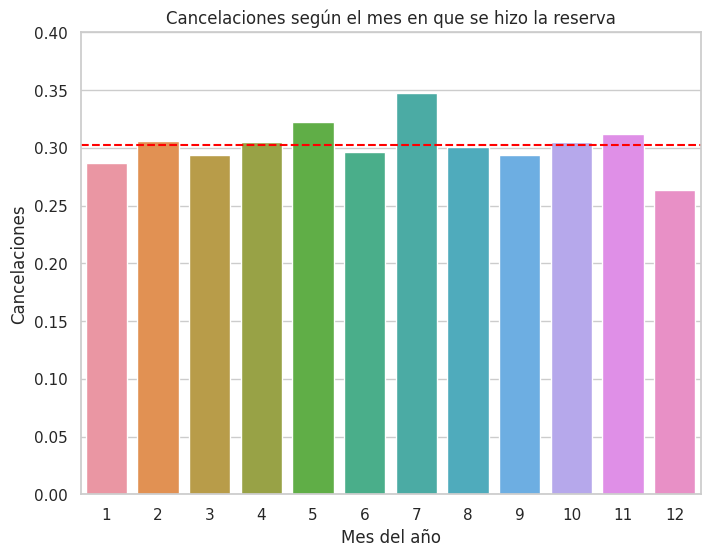

In [58]:
resultados_df = df.groupby('mes_compra')['is_canceled'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='mes_compra', y='is_canceled', data=resultados_df)

plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--')
plt.xticks
plt.ylim(0, 0.4)

plt.title('Cancelaciones según el mes en que se hizo la reserva')
plt.xlabel('Mes del año')
plt.ylabel('Cancelaciones')

plt.show()

Las reservas hechas en el mes 7 son las más canceladas, mientras que las hechas en el mes 12, son las menos canceladas.

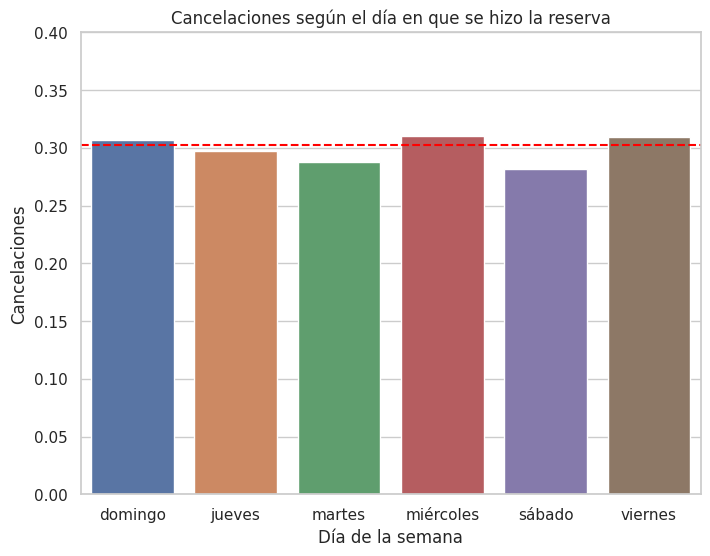

In [59]:
resultados_df = df.groupby('dia_compra')['is_canceled'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='dia_compra', y='is_canceled', data=resultados_df)

plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--')
plt.xticks
plt.ylim(0, 0.4)

plt.title('Cancelaciones según el día en que se hizo la reserva')
plt.xlabel('Día de la semana')
plt.ylabel('Cancelaciones')

plt.show()

Aparentemente, las reservas hechas los sábados son las que menos se cancelan, mientras que las hechas los miércoles son las que más se cancelan.
Tomando los datos de la tabla de abajo, vemos que los sábados son un día común de compra, y además tienen pocas cancelaciones, lo cual me indica que puede ser buen predictor.


In [60]:
df.dia_compra.value_counts()

jueves       756
sábado       742
miércoles    726
viernes      705
domingo      701
martes       668
Name: dia_compra, dtype: int64

### *arrival_timestamp*
Vamos a ver si hay relación entre la fecha programada de llegada (día de la semana  y mes) y las cancelaciones

In [61]:
df['fecha_llegada'] = pd.to_datetime(df['arrival_timestamp'])

In [62]:
df['mes_llegada'] = df['fecha_llegada'].dt.month
df.sample(2)

,booking_id,name,hotel,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,total_cost,...,has_theatre,stars,customers_country,date_of_birth,cost_quintiles,fecha_compra,mes_compra,dia_compra,fecha_llegada,mes_llegada
4092,e5323431-4056-49f0-89a3-cdbf3d461d27,Patricia Hicks,RCE,1,single,0,2022-06-27,2022-06-30,1,188.62,...,False,4,American Samoa,1978-04-30,"(56.039, 335.426]",2022-06-26,6,NaN,2022-06-27,6
4945,067e912c-5211-42d2-a466-76420c7b689d,Stephanie Curry,HTW,1,luxury,0,2022-03-09,2022-03-11,4,518.15,...,True,5,Austria,2001-11-09,"(335.426, 557.672]",2022-02-23,2,miércoles,2022-03-09,3


In [63]:
df['dia_llegada'] = df['fecha_llegada'].dt.dayofweek
a = {0:'domingo', 1:'martes', 2:'miércoles', 3:'jueves', 4:'viernes', 5:'sábado'}
df['dia_llegada'] = df['dia_llegada'].map(a)
df.sample(2)

,booking_id,name,hotel,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,total_cost,...,stars,customers_country,date_of_birth,cost_quintiles,fecha_compra,mes_compra,dia_compra,fecha_llegada,mes_llegada,dia_llegada
2569,29bffde9-61e9-4269-8260-e1434c480f2c,Margaret Rogers,YWO,1,suite,0,2022-04-09,2022-04-14,2,2016.00,...,1,Cote d'Ivoire,1964-10-29,"(1743.816, 2329.431]",2022-01-13,1,jueves,2022-04-09,4,sábado
2088,9f6695da-8381-42c9-9e42-f1f52402690d,Cassandra Marsh,TXL,2,suite,2,2022-09-06,2022-09-13,4,5632.31,...,1,Tokelau,1965-02-12,"(4768.213, 23428.24]",2022-08-02,8,martes,2022-09-06,9,martes


In [64]:
del(df['arrival_timestamp'])

In [65]:
df.mes_llegada.value_counts()

7     439
9     433
5     426
10    423
1     419
12    419
8     415
6     414
11    413
2     413
3     409
4     377
Name: mes_llegada, dtype: int64

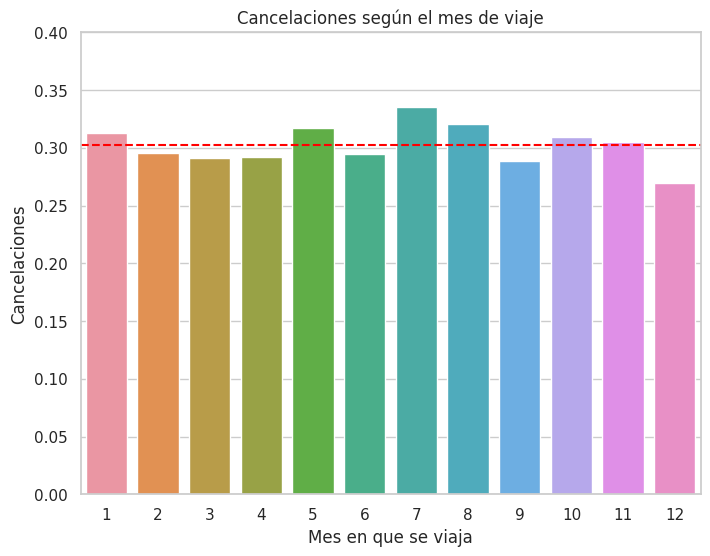

In [66]:
resultados_df = df.groupby('mes_llegada')['is_canceled'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='mes_llegada', y='is_canceled', data=resultados_df)

plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--')
plt.xticks
plt.ylim(0, 0.4)

plt.title('Cancelaciones según el mes de viaje')
plt.xlabel('Mes en que se viaja')
plt.ylabel('Cancelaciones')

plt.show()

Igual que para el caso de mes de compra, el mes 7 es el de más cancelaciones, y el 12 el de menos.

En el caso del mes 7 tiene sentido, pues la mayoría de reservas están hechas para ese mes. Sin embargo el mes 12 tiene muy pocas cancelaciones, y se encuentra con frecuencia media, puede ser buen predictor

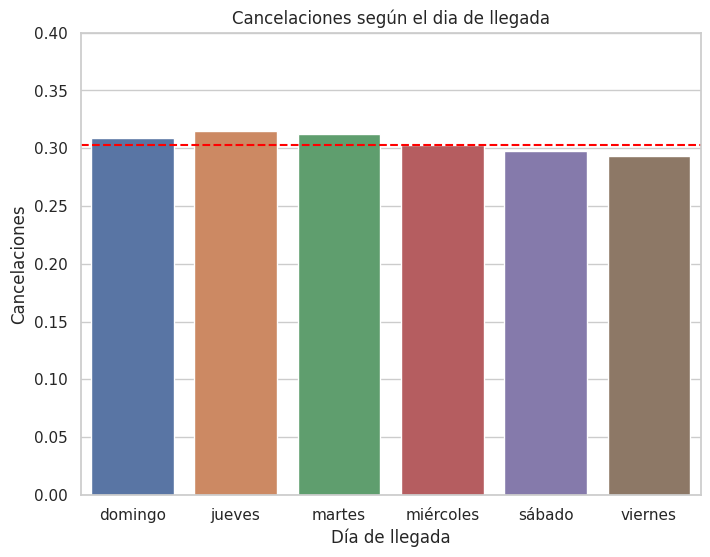

In [67]:
resultados_df = df.groupby('dia_llegada')['is_canceled'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='dia_llegada', y='is_canceled', data=resultados_df)

plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--')
plt.xticks
plt.ylim(0, 0.4)

plt.title('Cancelaciones según el dia de llegada')
plt.xlabel('Día de llegada')
plt.ylabel('Cancelaciones')

plt.show()

No obtenemos mucha información sobre la influencia de la variable dia_llegada en las cancelaciones

### Creación de la variable *mes_antelacion*
Vamos a ver si existe relación entre los meses de antelación con que se realiza la reserva, y las cancelaciones

In [68]:
df['mes_antelacion'] = df['mes_compra'] - df['mes_llegada']
df['mes_antelacion'] = df['mes_antelacion'].abs()

df.sample(2)

,booking_id,name,hotel,n_rooms,room_type,children,leave_timestamp,guests,total_cost,is_canceled,...,customers_country,date_of_birth,cost_quintiles,fecha_compra,mes_compra,dia_compra,fecha_llegada,mes_llegada,dia_llegada,mes_antelacion
1539,315c37bb-8b71-4eb1-9117-a720fe4fecc6,James Palmer,QLN,1,luxury,0,2022-06-04,1,2855.90,True,...,Mauritania,2000-06-29,"(2329.431, 3177.532]",2022-03-15,3,martes,2022-05-24,5,martes,2
3157,2a9979ae-9980-4d6a-bb94-48684ed3148a,Jessica Wood,VPH,2,suite,0,2022-04-29,6,8108.65,True,...,Brazil,1975-02-28,"(4768.213, 23428.24]",2022-02-04,2,viernes,2022-04-19,4,martes,2


In [69]:
df.mes_antelacion.describe()

count    5000.000000
mean        2.419200
std         2.913961
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        11.000000
Name: mes_antelacion, dtype: float64

In [70]:
df.mes_antelacion.value_counts()

1     1608
2     1410
0      819
3      552
10     257
9      226
11     128
Name: mes_antelacion, dtype: int64

La mayoría de bookings se ha hecho con uno o dos meses de antelación

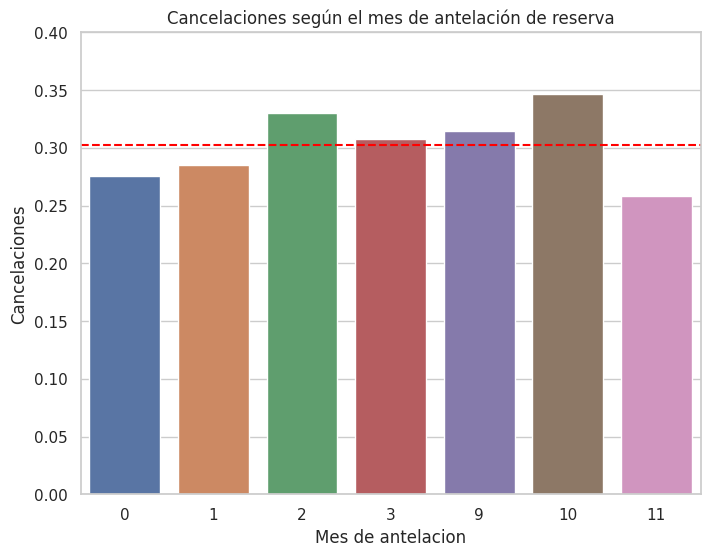

In [71]:
resultados_df = df.groupby('mes_antelacion')['is_canceled'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='mes_antelacion', y='is_canceled', data=resultados_df)

plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--')
plt.xticks
plt.ylim(0, 0.4)

plt.title('Cancelaciones según el mes de antelación de reserva')
plt.xlabel('Mes de antelacion')
plt.ylabel('Cancelaciones')

plt.show()

Nos llama la atención que aunque hacer la reserva con un mes de antelación es lo más frecuente, tiene bastantes menos cancelaciones que la media, por lo cual puede ser buen predictor. También obtenemos información sobre las reservas hechas con mucha antelación (11 meses), que no suelen cancelarse

### Variable *date of birth*
Vamos a quedarnos con la fecha de nacimiento para saber la edad de los clientes

In [72]:
df['year_of_birth'] = df['date_of_birth'].str.split('-', expand=True)[0]

In [73]:
del(df['date_of_birth'])

Eliminamos la fecha de nacimiento, pues lo que nos puede interesar es el año solamente, es decir, la edad que tiene la persona

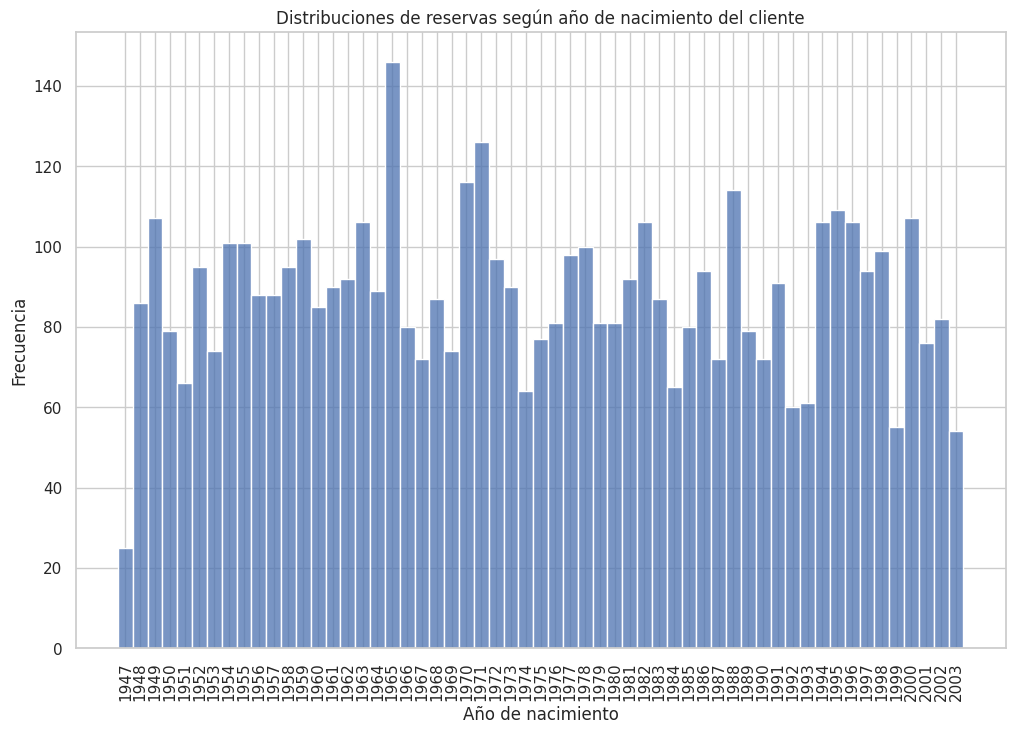

In [74]:
plt.figure(figsize=(12, 8))
sns.histplot(df['year_of_birth'].sort_values())
plt.title('Distribuciones de reservas según año de nacimiento del cliente')
plt.xlabel('Año de nacimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

Vemos que la mayor frecuencia de edad se encuentra en el año 1965

In [75]:
df['year_of_birth'] = df['year_of_birth'].astype(float)

In [76]:
df.year_of_birth.describe()

count    5000.000000
mean     1974.810600
std        16.048534
min      1947.000000
25%      1961.000000
50%      1974.000000
75%      1989.000000
max      2003.000000
Name: year_of_birth, dtype: float64

In [77]:
df['birth_quintiles'] = pd.qcut(df.year_of_birth, 7)
df['birth_quintiles']

0         (1963.0, 1970.0]
1         (1963.0, 1970.0]
2         (1995.0, 2003.0]
3         (1995.0, 2003.0]
4       (1946.999, 1955.0]
               ...        
4995      (1963.0, 1970.0]
4996      (1970.0, 1978.0]
4997      (1987.0, 1995.0]
4998      (1987.0, 1995.0]
4999      (1963.0, 1970.0]
Name: birth_quintiles, Length: 5000, dtype: category
Categories (7, interval[float64, right]): [(1946.999, 1955.0] < (1955.0, 1963.0] < (1963.0, 1970.0] <
                                           (1970.0, 1978.0] < (1978.0, 1987.0] < (1987.0, 1995.0] <
                                           (1995.0, 2003.0]]

He decidido hacer siete grupos de edad puesto que la diferencia entre el mayor y el menor es de 56 años, divisible entre 7 y 8

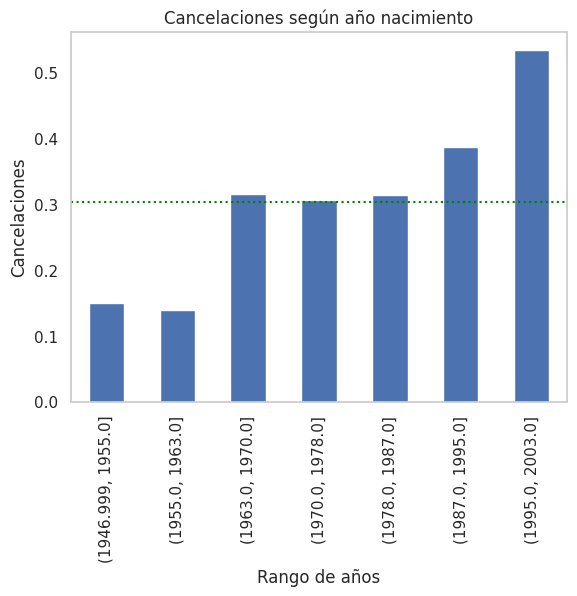

In [78]:
df.groupby('birth_quintiles').is_canceled.mean().plot.bar();
plt.title('Cancelaciones según año nacimiento');
plt.xlabel('Rango de años')
plt.ylabel('Cancelaciones')
plt.grid()
plt.axhline(df.is_canceled.mean(), c='green', linestyle=':')

Aparentemente los jóvenes son los que más cancelan, y las personas mayores son las que menos

### Creación de la variable *has_facilities*
Creamos una variable que agrupe piscina, spa y teatro, y de este modo indique si el hotel tiene algún tipo de facilidades

In [79]:
def has_facilities(fila):
    return fila['has_pool'] or fila['has_spa'] or fila['has_theatre']

df['has_facilities'] = df.apply(has_facilities, axis=1)

In [80]:
df['has_facilities'].value_counts()

True     4813
False     187
Name: has_facilities, dtype: int64

Tenemos la gran mayoría de reservas hechas en hoteles que tienen algún tipo de facilidad

In [81]:
df.groupby('hotel')['has_facilities'].mean().reset_index()

,hotel,has_facilities
0,BXO,1.0
1,CJY,1.0
2,CSM,1.0
3,ECJ,1.0
4,EUZ,1.0
5,GGE,1.0
6,GNT,1.0
7,GPP,1.0
8,GZD,1.0
9,HHO,1.0


Específicamente hay un solo hotel (PQL) que no tiene ningún tipo de facilidades.

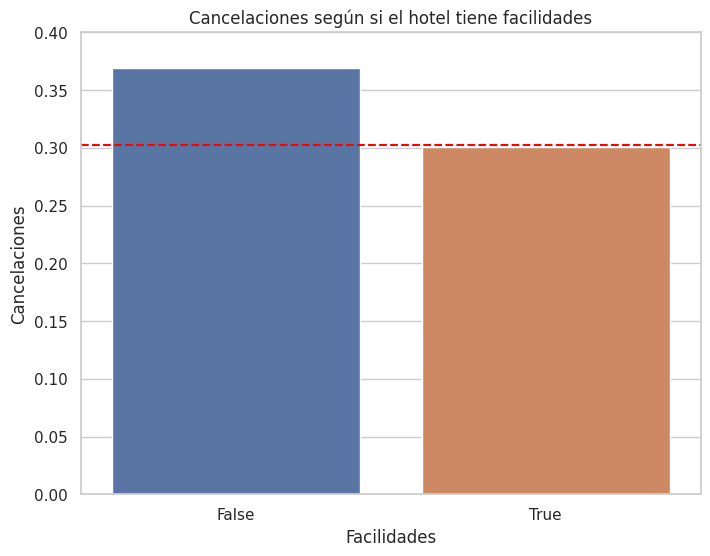

In [82]:
resultados_df = df.groupby('has_facilities')['is_canceled'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='has_facilities', y='is_canceled', data=resultados_df)

plt.axhline(df['is_canceled'].mean(), color='red', linestyle='--')
plt.xticks
plt.ylim(0, 0.4)

plt.title('Cancelaciones según si el hotel tiene facilidades')
plt.xlabel('Facilidades')
plt.ylabel('Cancelaciones')

plt.show()

Se observa que hay más cancelaciones en hoteles sin facilidades, que con facilidades, por lo cual podemos decir que esta nueva variable es un buen predictor

## Selección de predictores finales y dummies

In [83]:
df.head().T

,0,1,2,3,4
booking_id,cab0388e-1264-4029-be95-19739edea0f4,1a056edf-9cee-4436-8366-ff9602008641,f3c9d883-b025-40eb-9f50-636d2ea1ba17,0de21c8f-6d38-49d4-8c6f-a5d64e1a4cbb,ff1bdf16-dbb0-446c-9063-3ded421f8ffa
name,Marcia Salazar,Marcia Salazar,Charles Hansen,Charles Hansen,Jennifer Martin
hotel,EUZ,HHO,EUZ,GGE,EUZ
n_rooms,1,1,1,4,1
room_type,single,single,double,double,single
children,0,0,3,0,1
leave_timestamp,2023-01-24,2022-07-17,2022-08-04,2022-09-17,2022-09-17
guests,1,1,2,8,1
total_cost,873.17,315.4,1643.98,5693.07,431.19
is_canceled,False,True,False,True,False


In [84]:
features = ['n_rooms', 'room_type', 'children', 'guests', 'cost_quintiles', 'hotel_country', 'stars', 'customers_country', 'mes_antelacion', 'birth_quintiles', 'has_facilities']

Hemos pasado de un dataset inicial de 19 columnas (variables) a uno de 11

In [85]:
df[features].dtypes

n_rooms                 int64
room_type              object
children                int64
guests                  int64
cost_quintiles       category
hotel_country          object
stars                   int64
customers_country      object
mes_antelacion          int64
birth_quintiles      category
has_facilities           bool
dtype: object

In [86]:
X_aux = df[features].copy()
y = df.is_canceled

In [87]:
X = pd.get_dummies(X_aux, columns=['room_type', 'cost_quintiles', 'hotel_country', 'customers_country', 'birth_quintiles'])

# 2. **Creación de los modelos predictivos**

## 2.1 Árbol de clasificación
Para el caso de árbol de clasificación, vamos a trabajar con todas las variables

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 88), (4000,), (1000, 88), (1000,))

In [89]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [91]:
y_pred = model.predict(X_test)

In [92]:
f1_score = f1_score(y_test, y_pred)
f1_score

0.4698205546492659

No obtengo muy buen f1-score, por lo cual el modelo no es muy bueno

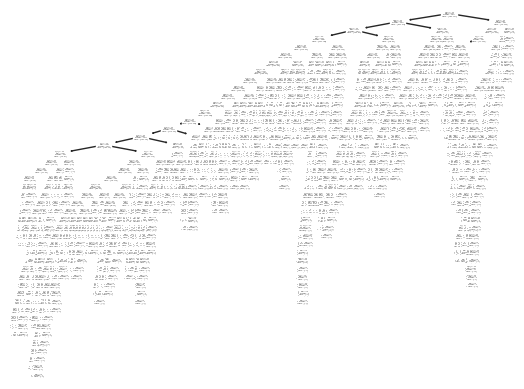

In [93]:
from sklearn.tree import plot_tree

plot_tree(model)
plt.show()

In [94]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_importances

mes_antelacion                      0.067061
guests                              0.054240
birth_quintiles_(1995.0, 2003.0]    0.044190
stars                               0.035302
children                            0.034060
                                      ...   
has_facilities                      0.004732
customers_country_Tokelau           0.004585
hotel_country_Liechtenstein         0.004484
customers_country_Liechtenstein     0.004223
customers_country_Iceland           0.001686
Length: 88, dtype: float64

No vemos una fuerte correlación entre las variables y el modelo

## 2.1.1 Mejora del árbol de clasificación usando GridSearchCV

In [95]:
from sklearn.model_selection import GridSearchCV


param_grid = {
  "max_depth" : [None, 10, 20, 30],
  "min_samples_leaf": [1, 2, 4, 8]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(class_weight="balanced"),
              param_grid=param_grid,
              scoring='f1',
              n_jobs=5,
              refit=True)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=5,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 8]},
             scoring='f1')

In [96]:
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

In [97]:
best_max_depth

In [98]:
best_min_samples_leaf

8

In [99]:
y_pred = grid_search.predict(X_test)

In [100]:
from sklearn.metrics import f1_score

f1_score = f1_score(y_test, y_pred)
f1_score

0.5061898211829435

Vemos que ha mejorado con respecto al anterior

In [101]:
y_pred = grid_search.predict(X_test)

from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(classification_report(y_test, y_pred))
print("Precission:", precision_score(y_true=y_test, y_pred=y_pred))
print("Recall:", recall_score(y_true=y_test, y_pred=y_pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       False       0.80      0.65      0.72       700
        True       0.43      0.61      0.51       300

    accuracy                           0.64      1000
   macro avg       0.61      0.63      0.61      1000
weighted avg       0.69      0.64      0.65      1000

Precission: 0.4309133489461358
Recall: 0.6133333333333333
F1-score: 0.5061898211829435


In [102]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[457, 243],
       [116, 184]])

## Mi mejor modelo es el del árbol de decisión usando GridSearchCV
Para este modelo, buscaremos lo siguiente:
- Umbral mínimo que garantiza una precission del 80 %
- Umbral máximo que garantiza un recall del 60 %
- Umbral que maximiza la f1 score

In [103]:
y_test_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

In [104]:
threshold_list = np.linspace(0, 1, 21)[1:-1]
test_precission_score_list = []

NEEDED_METRIC = 0.8

for threshold in threshold_list:
  pred = (y_test_pred_proba > threshold).astype('int')
  metric = precision_score(y_true=y_test, y_pred=pred)
  test_precission_score_list.append(metric)

  if metric >= NEEDED_METRIC:
    break
threshold, metric

(0.9500000000000001, 0.6923076923076923)

Este es el umbral mínimo que garantiza una precission del 80%

In [105]:
threshold_list = np.linspace(0, 1, 21)[1:-1][::-1]
test_recall_score_list = []

NEEDED_METRIC = 0.6

for threshold in threshold_list:
  pred = (y_test_pred_proba > threshold).astype('int')
  metric = recall_score(y_true=y_test, y_pred=pred)
  test_precission_score_list.append(metric)

  if metric >= NEEDED_METRIC:
    break
threshold, metric

(0.5, 0.6133333333333333)

Este es el umbral máximo tiene un recall de más del 60%

In [106]:
threshold_list = np.linspace(0, 1, 21)[1:-1]
test_f1_score_list = []

for threshold in threshold_list:
  pred = (y_test_pred_proba > threshold).astype('int')
  metric = f1_score(y_true=y_test, y_pred=pred)
  test_f1_score_list.append(metric)

In [107]:
threshold_list[np.argmax(test_f1_score_list)]

0.35000000000000003

Este es el umbral que me da el mejor f-1 score

## 2.2 Modelo de regresión logística
En este modelo voy a reducir las variables



In [108]:
features = ['n_rooms', 'room_type', 'children', 'guests', 'stars','cost_quintiles', 'mes_antelacion', 'birth_quintiles', 'has_facilities']

In [109]:
X_aux = df[features].copy()
y = df.is_canceled

In [110]:
X = pd.get_dummies(X_aux, columns=['room_type','cost_quintiles', 'birth_quintiles'])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 28), (4000,), (1000, 28), (1000,))

In [112]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(class_weight="balanced")
model_logistic.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [113]:
coeff_series = pd.Series(model_logistic.coef_[0], index=X_train.columns).sort_values()
coeff_series

birth_quintiles_(1955.0, 1963.0]      -1.014260
birth_quintiles_(1946.999, 1955.0]    -0.937437
room_type_single                      -0.780755
room_type_double                      -0.447974
cost_quintiles_(4768.213, 23428.24]   -0.378035
cost_quintiles_(3177.532, 4768.213]   -0.370725
cost_quintiles_(2329.431, 3177.532]   -0.354317
has_facilities                        -0.276896
cost_quintiles_(1743.816, 2329.431]   -0.192114
cost_quintiles_(1381.63, 1743.816]    -0.161180
room_type_triple                      -0.070436
guests                                -0.052252
children                              -0.011094
stars                                 -0.010397
mes_antelacion                         0.027597
birth_quintiles_(1970.0, 1978.0]       0.081563
cost_quintiles_(1071.258, 1381.63]     0.115262
birth_quintiles_(1978.0, 1987.0]       0.116557
birth_quintiles_(1963.0, 1970.0]       0.117478
room_type_luxury                       0.200096
cost_quintiles_(335.426, 557.672]      0

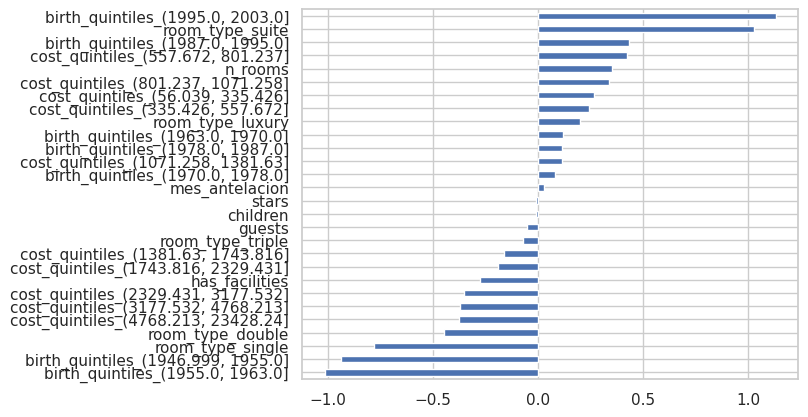

In [114]:
coeff_series.plot.barh();

Podemos observar cómo las variables año de nacimiento, tipo de habitación y precios, influyen mucho (tanto positiva como negativamente) en la cancelación de una reserva.
Variables como estrellas, niños, o mes de antelación no parece que tengan mucha influencia en el modelo.

In [115]:
y_test_pred = model_logistic.predict(X_test)

from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(classification_report(y_test, y_test_pred))
print("Precission:", precision_score(y_true=y_test, y_pred=y_test_pred))
print("Recall:", recall_score(y_true=y_test, y_pred=y_test_pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       False       0.79      0.65      0.71       700
        True       0.42      0.59      0.49       300

    accuracy                           0.63      1000
   macro avg       0.60      0.62      0.60      1000
weighted avg       0.68      0.63      0.65      1000

Precission: 0.4200477326968974
Recall: 0.5866666666666667
F1-score: 0.48956884561891517


Obtenemos mejor F1-score que con el primer árbol de decisión

## 2.2.1 Mejora del modelo de regresión usando GridSearch

In [116]:
from sklearn.model_selection import GridSearchCV

C_vec = [0.001, 0.05, 0.01, 0.05, 1, 5, 10]
param_grid = {"C": C_vec}

grid_search_logistic = GridSearchCV(estimator=LogisticRegression(class_weight="balanced"),
                          param_grid=param_grid,
                          scoring='f1',
                          n_jobs=3)
grid_search_logistic.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'), n_jobs=3,
             param_grid={'C': [0.001, 0.05, 0.01, 0.05, 1, 5, 10]},
             scoring='f1')

In [117]:
y_pred = grid_search_logistic.predict(X_test)

from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(classification_report(y_test, y_pred))
print("Precission:", precision_score(y_true=y_test, y_pred=y_pred))
print("Recall:", recall_score(y_true=y_test, y_pred=y_pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       False       0.79      0.65      0.72       700
        True       0.42      0.59      0.49       300

    accuracy                           0.64      1000
   macro avg       0.61      0.62      0.60      1000
weighted avg       0.68      0.64      0.65      1000

Precission: 0.4224343675417661
Recall: 0.59
F1-score: 0.4923504867872044


Vemos un f1-score algo mejor que el modelo que no usa GridSearchCV

# 3. **Análisis final**

- ¿ Qué hoteles o países de hoteles tienen una mayor tasa de cancelación?

Según el EDA que he realizado al principio del proyecto, el hotel que tiene mayores cancelaciones es el de Sierra Leona.
Nigeria, Brazil, o Siria son los que le siguen con mayores tasas de cancelaciones

- ¿ Qué países de cliente tienen una mayor tasa de cancelación?

Bangladesh, Austria y Brazil encabezan esta lista como los países de cliente que tienen mayores tasas de cancelaciones

- ¿ Existen rangos de edad para los cuales la tasa de cancelación es mayor o menor que la media?

Sí, los rangos de edades desde 1987 hasta 2003 son los que más cancelan, estando por encima de la media.
Los rangos de 1947 a 1963 tienen cancelaciones por debajo de la media

- ¿ Afecta la anticipación en la reserva de algún modo a la tasa de cancelación?

La conclusión que podemos obtener es que cuando se reserva con mucho tiempo de antelación (11 meses) o con muy poco tiempo (0-1 mes), las tasas de cancelaciones son bajas, estando por debajo de la media

- ¿ Hay algún tipo de habitación que sufra mayor propensión a las cancelaciones?

Las habitaciones grandes o de más clase (triples, luxury, suite) son las que tienen más propensión a la cancelación

- ¿ Afecta la distribución de los huéspedes de algún modo a la tasa de cancelación?

Podemos decir que reservas de pocos huéspedes (de uno a cuatro) tiene poca propensión a la cancelación, mientras que cuantos más huéspedes reserven, más probable es que terminen cancelando

- ¿ Afectan los servicios disponibles del hotel a la tasa de cancelación?

La presencia de algún tipo de servicio como piscina, spa o teatro sí influye en la tasa de cancelación, la reduce

- ¿ Qué activaciones de marketing/comerciales podemos realizar sobre la predicción del modelo de cancelaciones para reducir las mismas y mejorar la tasa de reservas que se completan?

Desde mi punto de vista algunas activaciones comerciales que se pueden realizar son:

-Ofrecer algún tipo de incentivo o promoción en aquellos hoteles que tienen mayores tasas de cancelación. Además, realizar un estudio en profundidad para averiguar por qué en Sierra Leona las cancelaciones superan las reservas

-Del mismo modo, incentivar con promociones y recordatorios de reservas a aquellos clientes de nacionalidades más propensas a la cancelación

-Promover la construcción de algún tipo de facilidad como piscina, spa o teatro en el hotel que no la tiene

-Intentar mantener los precios en un rango medio, ni muy elevados, ni muy bajos. De este modo puedo evitar las cancelaciones porque un hotel sea demasiado caro, o porque sea demasiado barato y no infunda confianza

-También hemos visto que clientes que reservan con tres niños cancelan menos. Por lo tanto yo recomendaría crear áreas para niños y organizar actividades para hacer que este tipo de clientela considere como primera opción reservar en nuestros hoteles

-Las habitaciones de rango superior tiene más cancelaciones, por lo tanto recomiendo crear ofertas especiales y atención personalizada enfocada a este tipo de clientela

-Atraer a un mercado más joven con promociones que les puedan interesar. Además invertir en anuncios y plataformas que atraigan su atención

Finalmente, como recomendaciones generales, considero buena idea implementar políticas de cancelación flexibles, facilitar lo máximo posible el proceso de reserva, y ofrecer un contacto con el servicio al cliente que sea sencillo y rápido